## Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
import string
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import re
from unidecode import unidecode
from nltk import corpus

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Analysis

In [3]:
df = pd.read_csv("Dataset.csv",encoding= 'unicode_escape')

In [4]:
df.head()

,recipe_name,category,description,details,ingredients,instructions,image_url,recipe_url,tags6,tags
0,Chewy Chocolate Chip Cookies,Cookie,"['Pinned over 3 million times, these super sof...","['Author: Sally', 'Prep Time: 10 minutes', 'Co...",['2 and 1/4 cups (280g) all-purpose flour(spoo...,"['Step 1:Whisk the flour, baking soda, cornsta...",https://cdn.sallysbakingaddiction.com/wp-conte...,https://sallysbakingaddiction.com/chewy-chocol...,cookie allpurpose flour baking soda cornstarch...,flour cornstarch butter egg chocolate
1,The Best Sugar Cookies,Cookie,"['With crisp edges, thick centers, and room fo...","['Author: Sally', 'Prep Time: 2 hours', 'Cook ...",['2 and 1/4 cups (281g) all-purpose flour(spoo...,"['Step 1:Whisk the flour, baking powder, and s...",https://cdn.sallysbakingaddiction.com/wp-conte...,https://sallysbakingaddiction.com/best-sugar-c...,cookie allpurpose flour baking powder salt uns...,flour butter egg almond
2,Dark Chocolate Chunk Oatmeal Cookies,Cookie,"['Soft and chewy with slightly crisp edges, th...","['Author: Sally', 'Prep Time: 45 minutes', 'Co...","['1 cup (230g) unsalted butter, softened toroo...",['Step 1:Using a hand mixer or a stand mixer f...,https://cdn.sallysbakingaddiction.com/wp-conte...,https://sallysbakingaddiction.com/dark-chocola...,cookie unsalted butter softened packed light d...,butter egg molasses flour cinnamon oat chocolate
3,Homemade Butter Cookies,Cookie,['Using just 8 basic ingredients and a large p...,"['Author: Sally', 'Prep Time: 20 minutes', 'Co...","['1 cup (2 sticks; 230g) unsalted butter, soft...",['Step 1:Read through the recipe and recipe no...,https://cdn.sallysbakingaddiction.com/wp-conte...,https://sallysbakingaddiction.com/butter-cookies/,cookie unsalted butter softened granulated sug...,butter almond egg flour milk chocolate marasch...
4,Chewy Oatmeal Chocolate Chip Cookies,Cookie,"['With oats, butter, and mostly all brown suga...","['Author: Sally', 'Prep Time: 1 hour, 10 minut...",['1 and 1/2 cups (188g) all-purpose flour(spoo...,"['Step 1:Whisk the flour, cinnamon, baking sod...",https://cdn.sallysbakingaddiction.com/wp-conte...,https://sallysbakingaddiction.com/oatmeal-choc...,cookie allpurpose flour ground cinnamon baking...,flour cinnamon butter egg molasses oat chocolate


In [5]:
df.shape

(1951, 10)

## Removing null and duplicate values

In [6]:
df.isnull().sum()

recipe_name     0
category        0
description     0
details         0
ingredients     0
instructions    0
image_url       0
recipe_url      0
tags6           0
tags            0
dtype: int64

In [7]:
df[df['image_url'].isnull()]

,recipe_name,category,description,details,ingredients,instructions,image_url,recipe_url,tags6,tags


In [106]:
df.drop_duplicates(subset = 'recipe_name',keep='first', inplace=True)

In [8]:
df.shape

(1951, 10)

In [9]:
df = df.dropna(axis=0)

In [10]:
df.isnull().sum()

recipe_name     0
category        0
description     0
details         0
ingredients     0
instructions    0
image_url       0
recipe_url      0
tags6           0
tags            0
dtype: int64

In [11]:
df.shape

(1951, 10)

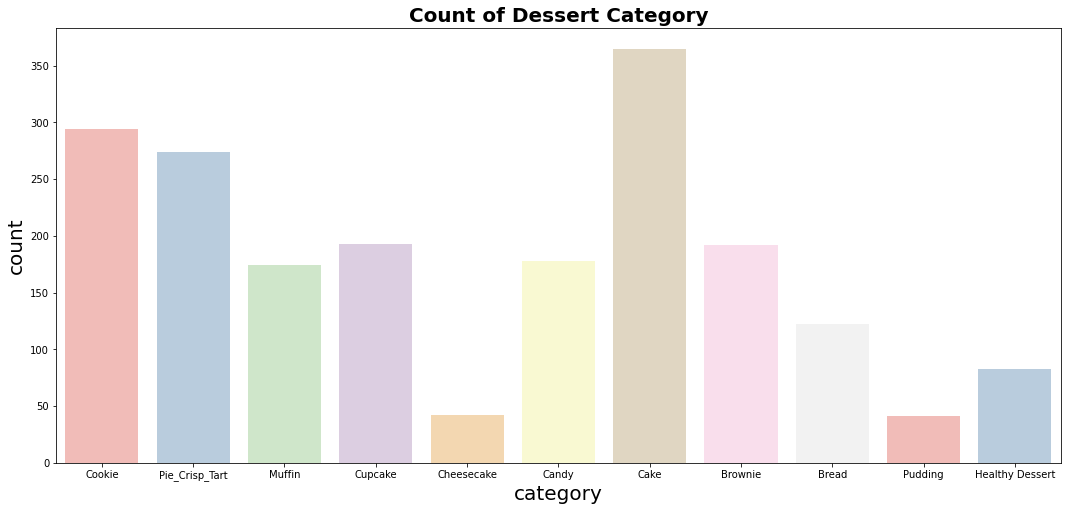

In [60]:
#Data Visualization
plt.figure(figsize=(18, 8))
plt.title("Count of Dessert Category",size='20',weight='bold')
plt.xlabel("",size='20')
plt.ylabel("",size='20')
sns.countplot(df.category,palette='Pastel1');

## Data Cleaning - Model 1

In [111]:
model1 = df[['recipe_name','ingredients','instructions']]

In [112]:
model1_clean = pd.DataFrame(columns = ['recipe_name','ingredients'])
model1_clean['recipe_name'] = model1['recipe_name']
model1_clean['ingredients'] = model1['ingredients']
model1_clean['instructions'] = model1['instructions']

In [113]:
import string
from nltk.corpus import stopwords
import re
def clean_ingredients(x):
    x = re.sub(r"\\xa0",' ',x)
    x = re.sub(r'\\n', ' ', x)
    x = re.sub(r'â\x80\x93', ' ', x)
    x = re.sub(r'â\x80\x99'," ",x)
    x = re.sub(r'[0-9]+', ' ', x)
    #x = ''.join([char for char in x if char not in string.punctuation])
    x = re.sub(r'\b\w{1,2}\b', ' ', x)
    x = re.sub(r'°',' ',x)
    x = x.lower()
    return x.strip()
    

In [114]:
model1_clean['ingredients_clean'] = model1['ingredients'].apply(clean_ingredients)

In [115]:
model1_clean

,recipe_name,ingredients,instructions,ingredients_clean
0,Chewy Chocolate Chip Cookies,"['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...","[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l..."
1,The Best Sugar Cookies,"['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...","[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu..."
2,Dark Chocolate Chunk Oatmeal Cookies,"['1 cup (230g) unsalted butter, softened toroom temperature', '1 cup (200g) packed light or dark brown sugar', '1/4 cup (50g) granulated sugar', '2 large eggs, at room temperature', '1 Tablespoon pure vanilla extract (yes, Tablespoon!)', '1 Tablespoon molasses', '1 and 1/2 cups (188g) all-purpos...","['Step 1:Using a hand mixer or a stand mixer fitted with paddle attachment, cream the softened butter and both sugars together on medium speed until smooth, about 2 minutes. Add the eggs and mix on high until combined, about 1 minute. Scrape down the sides and bottom of the bowl as needed. Add t...","[' cup ( ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' large eggs, room temperature', ' tablespoon pure vanilla extract (yes, tablespoon!)', ' tablespoon molasses', ' and / cups ( ) all-purpose flour(s..."
3,Homemade Butter Cookies,"['1 cup (2 sticks; 230g) unsalted butter, softened to room temperature', '3/4 cup (150g) granulated sugar', '1 and 1/2 teaspoons pure vanilla extract', '1 teaspoon almond extract', '1 large egg, at room temperature', '2 and 1/4 cups (281g) all-purpose flour(spoon & leveled)', '1/2 teaspoon salt'...","['Step 1:Read through the recipe and recipe notes before beginning. Make room in your refrigerator for a baking sheet so the shaped cookies can chill for 20-30 minutes. Without chilling, the piped cookies may over-spread. If you chill the dough prior to shaping, the dough will be too cold/stiff ...","[' cup ( sticks; ) unsalted butter, softened room temperature', ' / cup ( ) granulated sugar', ' and / teaspoons pure vanilla extract', ' teaspoon almond extract', ' large egg, room temperature', ' and / cups ( ) all-purpose flour(spoon & leveled)', ' / teaspoon salt', ' ..."
4,Chewy Oatmeal Chocolate Chip Cookies,"['1 and 1/2 cups (188g) all-purpose flour(spoon & leveled)', '1 teaspoon ground cinnamon (optional)', '1 teaspoon baking soda', '1 teaspoon salt', '1 cup (2 sticks; 230g) unsalted butter, softened toroom temperature', '1 cup (200g) packed li

In [116]:
training_df = pd.DataFrame(columns = ['recipe_name','ingredients','instructions','tags'])

In [117]:
training_df['recipe_name'] = model1_clean['recipe_name']
#training_df['description'] = model1['description']
#training_df['details'] = model1['details']
training_df['ingredients'] = model1_clean['ingredients']
training_df['instructions'] = model1_clean['instructions']
#training_df['recipe_url'] = model1['recipe_url']
training_df['tags'] = model1_clean['ingredients_clean']

In [118]:
pd.set_option('display.max_colwidth', 300)
training_df.reset_index(inplace = True)
training_df

,index,recipe_name,ingredients,instructions,tags
0,0,Chewy Chocolate Chip Cookies,"['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...","[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l..."
1,1,The Best Sugar Cookies,"['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...","[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu..."
2,2,Dark Chocolate Chunk Oatmeal Cookies,"['1 cup (230g) unsalted butter, softened toroom temperature', '1 cup (200g) packed light or dark brown sugar', '1/4 cup (50g) granulated sugar', '2 large eggs, at room temperature', '1 Tablespoon pure vanilla extract (yes, Tablespoon!)', '1 Tablespoon molasses', '1 and 1/2 cups (188g) all-purpos...","['Step 1:Using a hand mixer or a stand mixer fitted with paddle attachment, cream the softened butter and both sugars together on medium speed until smooth, about 2 minutes. Add the eggs and mix on high until combined, about 1 minute. Scrape down the sides and bottom of the bowl as needed. Add t...","[' cup ( ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' large eggs, room temperature', ' tablespoon pure vanilla extract (yes, tablespoon!)', ' tablespoon molasses', ' and / cups ( ) all-purpose flour(s..."
3,3,Homemade Butter Cookies,"['1 cup (2 sticks; 230g) unsalted butter, softened to room temperature', '3/4 cup (150g) granulated sugar', '1 and 1/2 teaspoons pure vanilla extract', '1 teaspoon almond extract', '1 large egg, at room temperature', '2 and 1/4 cups (281g) all-purpose flour(spoon & leveled)', '1/2 teaspoon salt'...","['Step 1:Read through the recipe and recipe notes before beginning. Make room in your refrigerator for a baking sheet so the shaped cookies can chill for 20-30 minutes. Without chilling, the piped cookies may over-spread. If you chill the dough prior to shaping, the dough will be too cold/stiff ...","[' cup ( sticks; ) unsalted butter, softened room temperature', ' / cup ( ) granulated sugar', ' and / teaspoons pure vanilla extract', ' teaspoon almond extract', ' large egg, room temperature', ' and / cups ( ) all-purpose flour(spoon & leveled)', ' / teaspoon salt', ' ..."
4,4,Chewy Oatmeal Chocolate Chip Cookies,"['1 and 1/2 cups (188g) all-purpose flour(spoon & leveled)', '1 teaspoon ground cinnamon (optional)', '1 teaspoon baking soda', '1 teaspoon salt', '1 cup (2 sticks; 230g) unsalted butter, softened toroom temperature', '1 cup (200g) packed

### Removing Stop Words

In [119]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk.tokenize import sent_tokenize, word_tokenize

In [120]:
training_df['tags1'] = training_df['tags'].apply(lambda tok: word_tokenize(tok))
training_df

,index,recipe_name,ingredients,instructions,tags,tags1
0,0,Chewy Chocolate Chip Cookies,"['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...","[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoons, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, d..."
1,1,The Best Sugar Cookies,"['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...","[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup..."
2,2,Dark Chocolate Chunk Oatmeal Cookies,"['1 cup (230g) unsalted butter, softened toroom temperature', '1 cup (200g) packed light or dark brown sugar', '1/4 cup (50g) granulated sugar', '2 large eggs, at room temperature', '1 Tablespoon pure vanilla extract (yes, Tablespoon!)', '1 Tablespoon molasses', '1 and 1/2 cups (188g) all-purpos...","['Step 1:Using a hand mixer or a stand mixer fitted with paddle attachment, cream the softened butter and both sugars together on medium speed until smooth, about 2 minutes. Add the eggs and mix on high until combined, about 1 minute. Scrape down the sides and bottom of the bowl as needed. Add t...","[' cup ( ) unsalted butter, softened toroom temperature', ' cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' large eggs, room temperature', ' tablespoon pure vanilla extract (yes, tablespoon!)', ' tablespoon molasses', ' and / cups ( ) all-purpose flour(s...","[[, ', cup, (, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', cup, (, ), packed, light, dark, brown, sugar, ', ,, ', /, cup, (, ), granulated, sugar, ', ,, ', large, eggs, ,, room, temperature, ', ,, ', tablespoon, pure, vanilla, extract, (, yes, ,, tablespoon, !, ), ', ,, ', ta..."
3,3,Homemade Butter Cookies,"['1 cup (2 sticks; 230g) unsalted butter, softened to room temperature', '3/4 cup (150g) granulated sugar', '1 and 1/2 teaspoons pure vanilla extract', '1 teaspoon almond extract', '1 large egg, at room temperature', '2 and 1/4 cups (281g) all-purpo

In [121]:
def word_lem(t):
    lt = [WordNetLemmatizer().lemmatize(i) for i in t]
    return lt
training_df['tags2'] = training_df['tags1'].apply(lambda l: word_lem(l))

In [122]:
import string
def remove_punct(text):
    df = [char for char in text if char not in string.punctuation]
    return df
training_df['tags3'] = training_df['tags2'].apply(lambda x: remove_punct(x))

In [123]:
training_df['tags4'] = training_df['tags3'].apply(lambda x: [word for word in x if word not in (stop)])
training_df

,index,recipe_name,ingredients,instructions,tags,tags1,tags2,tags3,tags4
0,0,Chewy Chocolate Chip Cookies,"['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...","[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoons, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, d...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoon, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, dark...","[and, cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, and, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vani...","[cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vanilla, extra..."
1,1,The Best Sugar Cookies,"['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...","[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup, ...","[and, cup, all-purpose, flour, spoon, leveled, plus, more, needed, for, rolling, and, work, surface, teaspoon, baking, powder, teaspoon, salt, cup, stick, unsalted, butter, softened, toroom, temperature, cup, granulated, sugar, large, egg, room, temperature, teaspoon, pure, vanilla,

In [124]:
def word_rem(t):
    measures=['teaspoon','tablespoon','cup','ounce','optional','spoon','leveled','inch','additional',
'stick','room','plus','needed','rolling','work','surface','room','temperature','toroom','semi-sweet'
,'extract','vanilla','large','baking','salt','all-purpose','unsalted',
'softened','ground','powder','chopped','pure','granulated','brown','soda','packed',
'confectioner','chip','fresh','oil','white','light','dark','melted','semisweet','package','heavy','optional',
'water','whole','divided','unsweetened','topping','zest','cake','canola','pie','cold','cubed','mix',
'frozen','sour','syrup','vegetable','sliced','plain','extra','whipping','beaten','filling','finely','grated',
'yolk','sweetened','shredded','freerange','frosting','sprinkle','medium','coarsely','cracker','red','food',
'creamy','graham','crust','whipped','regular','peeled','crushed','icing','natural','coloring','salted',
'lightly','dried','toasted','spice','size','fullfat','ice','caramel','bar','sifted','thawed','use','pinch',
'dusting','caster','see','crumb','instant','shortening','sea','cooled','coarse','miniature','garnish','piece',
'pastry','mini','ounce','note','canned','homemade','seed','oldfashioned','ripe','slightly','mashed','golden',
'powdered','dry','used','yellow','cut','coffee','sauce','puree','full','warm','quality','cooky','rolled',
'slice','taste','tbsp','green','sprinkling','pound','kosher','half','greasing','glaze','block','sheet','hot',
'teaspoonsalt','halfandhalf','small','drained','espresso','for','greek','pudding','glutenfree','drop',
'tartar','black','inch','sweet','allspice','paste','fat','sprig','bittersweet','recipe','pretzel','bean',
'halved','fatfree','reducedfat','chunk','dutchprocess','top','tart','pitted','double','dough','wash',
'organic','jar','two','dash','active','make','gel','leaf','teaspoonbaking','cookie','creme','mixed','gram',
'selfraising','soft','rainbow','bunch','thaw','assorted','coating','heaped','carton','heaping','cube',
'fruit','largeegg','teaspoonpure','and','diced','poppy','higherwelfare','quick','flavor','puff',
'stock','pink','decorating','freshly','separated','evaporated','refrigerated','additional',
'pod','box','preserve','minced','boiling','candied','seedless','quickcooking','sprinkles','largeeggs',
'teaspoonground','tsp','fine','thinly','date','strong','clear','solidpack',
'roasted','roughly','bit','slivered','yes','bag','color','fudge','gingersnap',
'warmed','serve','butterscotch','english','prefer','standard','cooked','royal',
'darkbrown','teaspoonspure','dutch','choice','sunflower','scraped','flake',
'dairyfree','flaky','raw','style','favorite','gum','wafer','','pop',
'colored','decoration','key','kiss','unwrapped','liquid','granule','fullsheet',
'bottom','cupcake','pan','unflavored','brownie','splash','envelope','smoked',
'hershey','serving','brand','shelled','nonpareil','cored','blue','champagne',
'brewed','jimmy','level','knob','dayold','process','total','toffee',
'freezedried','teaspoonsbaking','crystallized','stuf','solid','jelly','handful',
'free','purpose','ganache','french','cacao','tin','kind','packedlight',
'storebought','seeds','ghirardelli','quartered','creamorheavy','mascarpone',
'container','nonfat','grating','crã¨','fraã®che','little','thick','myrecipe',
'bourbon','baked','melt','undrained','paper','bicarbonate','semiskimmed',
'flatleaf','sugarfree','desired','andes','snicker','using','chilled','firm',
'reduced','smooth','tea','flavoring','brick','crumbled','stem','good',
'dutchprocessed','well','shortcrust','leek','sustainable','source','picked',
'strip','concentrate','wooden','need','unsaltedbutter','heath','step','etc',
'devil','broken','shell','like','leftover','high','peel','liqueur','packet',
'flaked','substitute','baby','cayenne','bay','roll','unsulphured','dairy',
'chunky','four','toppings','baker','morsel','crunchy','loosely','orall',
'edible','shaving','medjool','le','chai','star','batter','krispies','blend',
'tip','vegan','single','cider','layer','yoghurt','blanched','sage','purã©',
'loaf','licorice','blockcream','unbakedflaky','hand','hulled','meal','freeze','drizzling',
'granny','smith','minute','boneless','heattreated','cool','whip','quart','pearl',
'split','amaretto','brickstyle','chex','purple','fig','mixture','prepared','',
'challenge','starch','piping','runny','blossom','litre','goodquality',
'rasher','streaky','mari','piper','fillet','preferably','freezer','streusel',
'tube','doublecrust','singlecrust','qualitysemisweet','sparkling',
'add','heart','spread','added','brushing','special','aka','removed','twist',
'coldheavy','curl','goat','skinless','round','gold','recommended','three',
'low','turbinado','saltine','squeezed','without','ingredient','cooking',
'anise','torn','filo','skin','worcestershire','chive','finish',
'mold','sanding','crack','beat','even','addin','pepitas','fun','sized','lightbrown',
'dutchprocesscocoa','batch','variety','around','mediumlarge','buttery','herb','dulce',
'leche','better','certified','approximately','agave','stout','fullfatsour',
'guinness','store','sandwich','square','kraft','bundt','cheesecake','maldon',
'patted','flower','trimmed','washed','rose','muscovado','decorate','desiccated',
'sultana','granola','suitable','allbutter','salad','cone','bran','biscuitbaking',
'teaspoonsground','recommend','alternative','rolledoats','save','hard','life',
'tablespoonpure','drizzle','®','menthe','post','trader','joe','','decor',
'melting','processor','old','fashioned','rinsed','fullfatcream','sugarorgranulated',
'approx','halve','soaked','pea','crisp','texture','wholewheat','bailey',
'pasteurized','fluff','suggestion','pastel','sleeve','dryroasted','long',
'yogurtgreek','pint','spiced','side','help','still','platinum','sundried',
'unsulfured','bob','campfireâ®','promised','land','reduction','wild','sponge',
'polenta','demerara','clementine','eating','prune','suet','thigh','bone',
'mincemeat','haddock','meat','shortbread','dove','farm','spray','rye',
'blackstrap','caraway','deg','croissant','nonalcoholic',
'cookandserve','sundae','german','unblanched','disk','neon','equivalent',
'sectioned','outstanding','easy','non','boxed','unbleached','icingoreasy',
'brickle','saver','corner','bark','biscoff','substitution','pillsbury',
'butterfinger','pictured','navel','covered','stark','mound','coated',
'semi','tiny','choppedapples','coldunsalted','enough','teaspoonfresh',
'myrecipes','later','crustor','asparagus','recipeor','creamheavy','thin','refrigerator',
'delicious','breast','real','cannedpumpkin','creamoryogurt','remaining','about',
'preferred','best','processed','reserved','bought','philadelphia','grind','funsize',
'easter','airpopped','tightly','rod','want','largeripebananas','creamer','vegetableoil',
'angel','crispy','whichever','table','mill','maintain','bright','foot','king',
'fruity','another','buckwheat','spooned','tall','','essence','groundnut',
'superfine','wholemeal','nectar','button','scottish','pine','armagnac','sorghum',
'porridge','feta','pack','steak','pinboned','ask','end','fraiche','prawn','readymade',
'courgette','ball','fondant','dill','mature','roast','turkey','shoulder','gravy',
'chickpea','sustainably','sourced','nib','citron','unpeeled','cornbreadmuffin','jalapeno',
'dinner','butterscotchcaramel','kahlua','lemonlime','selfrising','cottage','eye',
'spreadable','butterflavored','bulk','individual','phyllo','combination','teaspooncoconut',
'sure','unsweetenedcocoa','orwhole','blotted','ouncesemisweet','dye','lightdark','gift',
'recipient','may','tasty','flax','crunch','duncan','hines','vegetablecanola',
'temperaturewater','love','groundcinnamon','omit','chocolatemorsels','rolos','raisinets',
'dust','milky','way','snack','york','patty','teaspoonsfresh','teaspoondried',
'crustorall','pin','lb','weight','fullfatsweetened','super','florals','darkcorn',
'unbaked','tablespoonsconfectioners','eyeball','cutter','sharp','brussels','sprout',
'prevent','diamond','encouraged','lady','stalk','perfectly','honeycrisp',
'included','also','ripebananas','shreddedgrated','breakfast','jalapeã±','lowfat',
'cow','depending','reduce','muffin','granulatedsugar','nondairy','blot',
'creamor','irish','snowflake','skip','confetti','unrefined','mccormick','â¼teaspoon',
'meyer','distilled','tablespoonslemon','jetpuffed','snickerdoodle',
'jello','creamfilled','filled','cookiecrumbs','usecrunchy','nabisco','unthawed',
'flavored','salty','lucky','charm','coarseraw','cinnamonsugar','mellowcreme',
'popped','preference','circle','squareshaped','hug','time','get','imitation',
'culinary','must','grand','marnier','additionalegg','burnt','fluffâ',
'shine','disc','browned','bottle','tablespoonsgranulated','pouch','betty',
'crocker','called','back','find','lacking','asiago','oilpacked','handswork',
'tossed','starâ®platinum','seasoning','bisquick','dissolved','mist','temp','fisher',
'swan','pureed','deluxe','thicker','pebble','crisco','ring','passion','joy',
'velvet','praline','silver','dragee','sugared','holiday','nog','straw',
'stirred','micro','scotch','earl','grey','unpacked','butterfingers','grenadine',
'quarter','korbel','cordial','marzipan','colouring','brittle','bramley','semidried',
'big','petal','jersey','chuck','duck','juniper','crumble','fishmonger','leicester',
'veal','fennel','lancashire','seasonal','chard','seafood','bass','tarragon','dijon',
'jarred','defrosted','calvados','ham','virgin','spring','grain','lard','curry',
'belly','wholegrain','port','floury','liver','give','readyrolled','head','rock',
'ale','dice','tub','blind','treacle','matcha','lengthwise','kernel','sel',
'uncooked','pen','gingerbread','germ','dressing','creamstyle','chile','pimiento',
'seeded','rubbed','mexican','bagel','challah','latte','bitesized','alcoholic',
'iced','reducedsugar','amber','tidbit','chipotle','shaved','ready','dot','dum',
'lollipop','redhot','waterpacked','fully','hash','shoestring','liner','mega','air',
'cupcakes','wedge','root','blood','macaroon','ofwhite','cupmini','teaspoonspumpkin',
'ouncesemisweetorbittersweet','gtotal','labeled','pure','caneâ','tinting',
'teaspoonscornstarch','moisture','bottled','teaspoonalmond','choppedminced','freshlemon',
'measure','sifting','blockfullfat','stamping','jolly','rancher','your','tablespoonmolasses',
'qualitywhite','chocolatebar','siftedconfectioners','canbe','jellybeans','andcoarsesugar',
'chocolatecoated','buttercreamand','vanillawhite','tablespoonred','beet','yield',
'tablespoonsmeringue','kit','closer','watermelonflavor','americolor','kitfor',
'goldsprinklesandoredible','glitterstars','sucanat','speculoos','icingor','eggsat',
'replace','whitechocolate','typically','werther','originalâ®baking','thinning',
'rolo','nestlã©','toll','houseâ®','cookiedough','shown','snocaps','wrapped',
'pulverized','ruffled','orheath','bricklebaking','sizeor','bakingchips',
'butterscotchmorsels','stir','tablespoonmilk','rough','oilormelted','teaspoongroundnutmeg',
'frozenblueberries','teaspoonorange','wholeoreos','lbssweet','teaspooncream','bath',
'either','choppedsliced','ozcan','groundblack','rolling','ruler','pizza',
'knife','brush','piã±ata','largebananas','cupconfectioners','cupinstant','bitesize',
'sliveredchoppedsliced','odense','ouncebittersweet','shake','lemonjuice','lemonslices',
'flag','design','choppedstrawberries','teaspoonslemon','brownsugar','browning','california',
'couple','preservesmixed','stemmed','fuji','aril','broth','cuphalfandhalf','photo',
'lattice','thawedor','menth','plainvanilla','thinner','consistency','fruitveggie',
'fortopping','darkchocolate','teaspoonallspice','stuff','cupfresh','flavorfat',
'content','nonoily','cuploosely','mine','mash','meltedcoconut','teaspoonpumpkin',
'cupreduced','bottleguinness','purevanilla','ofsalt','choppedpeanuts','blog','prefergel',
'andground','intense','glitter','useamericolor','purplefood','nature','valencia','please',
'option','marshmallowfluff','slicesfor','andcrushed','read','minisized','andchocolate',
'rid','clump','decorative','instruction','riper','carameland','could','teaspooneach',
'groundgingerand','teaspooncornstarch','teaspoonlemon','rawalmonds','caramelandwhipped',
'funsized','orhomemade','toast','regularsize','cupmeltedpeanut','lightcream','bleed',
'ouncequality','tempered','buttering','creamypeanut','teaspoonvegetable','mll',
'tablespoonsunsulphured','robin','standardsize','dipping','popsicle','pour','blender',
'pulse','let','release','much','pasty','would','making','once','pas','sifter',
'larger','shape','decaf','ounceblock','mauve','freshcranberries','less','frangelico',
'teaspoonsespresso','teaspoonswarm','peeledandshredded','teaspoonsplatinum','creamorwhole',
'tablespoonground','finelychopped','teaspoonssalt','fatsour','mediumapples','intosmall',
'glossy','mediumpears','darkmolasses','liquor','sold','kirsch','kirschwasser','groundnutmeg',
'nakedstyle','finishing','inspiration','teaspoonsgranulated','groundallspice','orcaramel',
'teal','frostingor','jampreserves','vanillaicing','carrotcake','produce','minus','stand',
'groundcloves','carrotzucchini','standardpackage','yummy','colorful','frying','freshorange',
'tablespoonscornstarch','ouncessweetened','lindt','per','unsulphuredmolasses','grandma',
'gummy','bear','cupmilk','pulsed','andcold','batteror','','oatsorquick','press',
'naturalordutchprocess','gallon','cupmashed','coarseflaky','choppednuts','important',
'sliceswhen','icingfor','tablespoonsallpurpose','caramelor','looselypacked','midnight',
'twix','notthaw','oldfashionedrolled','strongly','usedhershey','ozwhite','mixins','swirl',
'chocolatewhite','premade','dense','reserve','krispie','unsweetenedapplesauce','followed',
'tutorial','instantoractive','multigrain','walnutspecans','nutsseeds','teaspoongarlic',
'flakycoarse','counter','bakingpowder','largeeggbeaten','activedry','sinking','teaspoonsred',
'preservesjam','stylecream','italian','nilla','sprite','sierra','julienne','moist',
'skim','cupidmallows','bing','freshlysqueezed','bunny','look','arthur','powered',
'fleischmann','neutraltasting','grass','eggswirlers','version','butterflavor','mild',
'tasting','cocacolaâ®','ghoster','roaster','tombstone','toothpick','mores',
'jell','truwhip','gradually','intensity','varies','mott','original','festive',
'power','bench','scraper','revolving','turn','towel','overnight','',
'alyssum','turquoise','made','smaller','follow','strongbrewed','loose','firmly',
'','violet','wrapper','disposable','confectioners','strained','remove',
'country','lemonheads','elderflower','flavourless','crystalised','fubã¡','flavour',
'tipo','dessert','tesapoon','egs','caramelised','finecut','hundred','thousand','glacã©',
'thincut','run','sailor','jerry','base','bee','pollen','yuzu','confit','tahitian',
'puffed','nougat','beetroot','stale','smallmedium','caramelly','clotted','cracked',
'plantbased','coloured','boiled','brazil','spelt','horlicks','maltesers','millet',
'pancetta','hispi','sweetheart','brisket','stilton','pheasant','grouse','partridge',
'quail','woody','live','lobster','bulb','prosecco','kale','cavolo','nero','scallop',
'gurnard','sole','watercress','pesto','spear','choux','dehydrated','frangipane',
'cointreau','porcini','tunworth','lardons','gruyã¨','neck','pecorino','swiss',
'kalamata','hardboiled','chantecler','gianduja','aubergine','crã','patissiã',
'sprouting','longgrain','dripping','sirloin','stone','free­range','coley',
'whiting','cod','undyed','broad','podded','potoatoes','garam','masala',
'ajwain','filleted','salsa','verde','cornichons','caper','centre','timing',
'diameter','cleaned','truffle','maderia','jus','rol','turnip','rogan','josh',
'parsnip','swede','goose','mince','rabbit','deboned','hotwater','sachet',
'edward','pimp','deseeded','thumbsized','heat','fiend','available','lincolnshire',
'poacher','pig','kidney','pinhead','skirt','westcombe','field','stewing',
'venison','vacpacked','chesntnuts','shin','butcher','local','barley','atora',
'waxy','gala','russet','cox','pimm','soured','flan','merchant','gourmet','loganberry',
'gooseberry','nest','fillings','favourite','quantity','acidic','lengthways','extralarge',
'grinder','greentea','fortune','lyle','einkorn','nonstick','milled','bellegarde',
'clarified','sadaf','silvana','kitchen','fivespice','cultured','honeyroasted',
'wellstirred','tahini','glutino','unsifted','heilala','gris','italianstyle','anisette',
'aniseflavored','bonne','maman','paradise','company','saba','dal','earth',
'balance','ounces','endangered','specie','bold','silky','trans','redfood',
'bitter','raisins','pieces','coat','several','flavorscolors','rawpistachionuts',
'line','tray','likemaldon','robust','thoroughly','pulverize','placing','sealed',
'doubled','mallet','hammer','gently','choppedground','chopper','gratednutmeg',
'liquidy','allergy','info','gluten','allergenfree','enjoy','steel','liking',
'percent','okay','min','dredging','fleur','thickcut','quaker','sub','grade',
'plant','based','filippo','berio','cutting','partskim','ranch','quickrise',
'stoneground','muenster','sourdough','panettone','pina','colada','glazed','brioche',
'unfrosted','custard','wheel','ladyfinger','tootsie','drip','garnishes','creature',
'starburst','pearlized','gumdrop','multicolored','conversation','cocktail','pectin',
'matzo','spearmint','drink','styrofoam','hots','decorator','sixlets','chow',
'mein','noodle','ruby','chocolatecovered','ancho','brownies','striped','waverly','snipped',
'weed','enchilada','avocado','welldrained','cakecookie','gingerroot','portion',
'muffins','link','mayonnaise','jumbo','lump','crabmeat','louisianastyle','colbymonterey',
'jack','spicy','soup','undiluted','seasoned','panko','gummi','skittle','bite',
'plenty','junior','skewer','laffy','taffy','tan','milano','pullandpeel','foil',
'gem','cheerios','balloon','frosted','froot','loop','snacksize','pull','ritz','dip',
'marble','other','citric','acid','malted','chia','plastic','bosc','vinaigrette',
'club','aniseed','pulp','vodka','anjou','cantaloupe','melon','rib','largecrystal'
'count','diet','crescent','brie','dumplings','mandarin','sugar','semi-sweet','old-fashioned','-ounce',"'one","'optional",
"half-and-half","'pastry","single-crust","fat-free","reduced-fat","'additional","'two","-ouncesemi-sweetorbittersweet",
"and/","'salt","'small","'royal","largeegg+","'two","-ouncesemi-sweet","chopped/minced","'pinch","'gift","'rainbow",
"'vanilla","'coarse","'sea","'black","free-range","'filling","full-fat","'topping","'frosting","'for","-inch",
              "gluten-free","dutch-process","'glaze","'dash","'homemade","'egg","'whipped","self-raising","'zest",
              "higher-welfare","quick-cooking","'sprinkles","'fresh","'icing","solid-pack","'assorted","full-sheet",
              "dairy-free","'chopped","'white","day-old","freeze-dried","one","store-bought","'seeds","'red","'sauce",
              "flat-leaf","sugar-free","dutch-processed","'green","squash","'plain","semi-skimmed","'toppings",
              "'cake","'colored","ricotta","meringue","heat-treated","'toasted","brick-style","'ground",
              "'caramel","good-quality","'freshly","'dough","'streusel","double-crust","qualitysemi-sweet",
              "semi-sweetchocolate","'three","breadcrumb","'batter","'sweetened","whole-berry","'pink",
              "add-in","dutch-processcocoa","'garnish","'salted","full-fatsour","'yellow","'four",
              "'edible","'soft","all-butter","'ganache","'crust","biscuit/baking","'extra",
              "'buttery","sun-dried","grapeseed","'whole","lemonade","'syrup","'crã¨",
              "'fruit","'powdered","cinnamon-raisin","cook-and-serve","'cheesecake",
              "medium/large","'flaky","cream/heavy","'about","fun-size","'turbinado","'candy","air-popped",
              "dry-roasted","'gel","'large","'seedless","'gold","'coffee","'unsalted","'sweet","'meringue",
              "'crystallized","'vegetable","'cayenne","pin-boned","ready-made","'baking","'decorating",
              "cornbread/muffin","butterscotch-caramel","lemon-lime","self-rising","'purple","'sliced","'sanding",
              "add-","light/dark","vegetable/canola","full-fatsweetened","'hot","'all-purpose","'pie",
              "shredded/grated","low-fat","'remaining","'food","'â¼teaspoon","jet-puffed","'reserved",
              "cream-filled","'pastel","coarse/raw","'circle","square-shaped","'hershey","largeeggs+","'use",
              "medium-large","oil-packed","hands/work","'softened","'crushed","'maldon","'silver","'poppy","'sugared",
              "'dairy-free","semi-dried","'semi-skimmed","'crumble","ready-rolled","'gluten-free","'roast",
              "'creme","'grated","cream-style","bite-sized","reduced-sugar","'candied","'paste","ready-","'coating",
              "butter-flavored","red-hot","'brownie","'fudge","water-packed","'thinly","'neon","'cupcakes","'miniature",
              "'mocha","blockfull-fat","'your","chocolate-coated","vanilla/white","'americolor","'goldsprinklesand/oredible"
              ,"'water","sno-caps","-stir","chopped/sliced","'rolling","'ruler","'pizza","bite-size",
              "slivered/chopped/sliced","'handful","'enough","cuphalf-and-half","step-","-step","'full",
              "plain/vanilla","fruit/veggie","non-fat","flavor/fat","non-oily","'mccormick","'liquid","mini-sized",
              "'key","fun-sized","-ouncequality","standard-size","'pour","'once","'less","naked-style","'finishing",
              "jam/preserves","'around","naturalordutch-process","'coarse/flaky","tablespoonsall-purpose",
              "loosely-packed","old-fashionedrolled","mix-ins","pre-made","'flaky/coarse","active-dry","'sparkling",
              "freshly-squeezed","'bunny","cut-","neutral-tasting","butter-flavor","coca-colaâ®","'mores","jell-",
              "'shredded","'festive","'piping","'revolving","'turquoise","'toffee","strong-brewed","'corn","'violet",
              "'confectioners","'lemonheads","'dark","super-fine","'sour","'caramelised","fine-cut","'hundred",
              "thin-cut","'base","'tahitian","'brittle","'rice","'natural","'sponge","small/medium","'caramelly",
              "plant-based","'dried","'choux","'frangipane","hard-boiled","'crã","long-grain","'gravy",
              "free­-range","'salsa","'vegan","'hot-water","thumb-sized","'salad","'double","vac-packed","'sunflower",
              "'quality","'shortcrust","'fillings","extra-large","green-tea","whole-grain","'nonstick","five-spice",
              "honey-roasted","well-stirred","italian-style","anise-flavored","-ounces","'cookie","'pieces",
              "flavors/colors","doubled-","chopped/ground","allergen-free","'sprinkling","'fleur","thick-cut",
              "part-skim","quick-rise","stone-ground","'spread","peppercorn","pepperoni","'creamy","'half-and-half",
              "'bourbon","'iced","'spiced","'drip","'dry-roasted","'confetti","'favorite","'garnishes",
              "'blue","-use","waffle","chocolate-covered","'brownies","well-drained","cake/cookie","'muffins",
              "-serve","louisiana-style","colby-monterey","'shoestring","'mascarpone","'tan","'milano","pull-and-peel",
              "'cheerios","'froot","snack-size","pull-","-peel","'chunky","'coarsely","'other","'fondant","'malted",
              "'clear","'unsweetened","'butter-flavored","-pulp","'shaved","'dressing","'torn","large-crystal","count",
              "'ice","'freeze-dried","'dumplings","'melted","'blanched"]

    lt = [i for i in t if i not in measures]
    return lt
training_df['tags5'] = training_df['tags4'].apply(lambda l:word_rem(l))
training_df

,index,recipe_name,ingredients,instructions,tags,tags1,tags2,tags3,tags4,tags5
0,0,Chewy Chocolate Chip Cookies,"['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...","[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoons, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, d...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoon, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, dark...","[and, cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, and, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vani...","[cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vanilla, extra...","[flour, cornstarch, butter, egg, egg, chocolate, chocolate]"
1,1,The Best Sugar Cookies,"['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...","[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup, ...","[and, cup, all-purpose, flour, spoon, leveled, plus, more, needed, for, rolling, and, work, surface, teaspoon, baking, powder, teaspoon, salt, cup, stick, unsalted, butter, softened, toroom, temperature, cup, granul

In [125]:
def my_function(text):
    df = list(dict.fromkeys(text))
    return df 

training_df['tags6'] = training_df['tags5'].apply(lambda x: my_function(x))
training_df

,index,recipe_name,ingredients,instructions,tags,tags1,tags2,tags3,tags4,tags5,tags6
0,0,Chewy Chocolate Chip Cookies,"['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...","[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoons, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, d...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoon, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, dark...","[and, cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, and, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vani...","[cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vanilla, extra...","[flour, cornstarch, butter, egg, egg, chocolate, chocolate]","[flour, cornstarch, butter, egg, chocolate]"
1,1,The Best Sugar Cookies,"['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...","[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup, ...","[and, cup, all-purpose, flour, spoon, leveled, plus, more, needed, for, rolling, and, work, surface, teaspoon, baking, powder, teaspoon, salt, cup, stick, unsalted

In [126]:
training_df['tags7'] = training_df['tags6'].apply(lambda x:' '.join([word for word in x if word not in string.punctuation]))
training_df

,index,recipe_name,ingredients,instructions,tags,tags1,tags2,tags3,tags4,tags5,tags6,tags7
0,0,Chewy Chocolate Chip Cookies,"['2 and 1/4 cups (280g) all-purpose flour(spoon & leveled)', '1 teaspoon baking soda', '1 and 1/2 teaspoons cornstarch', '1/2 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, melted & slightly cooled', '3/4 cup (150g) packed light or dark brown sugar', '1/2 cup (100g) granulated su...","['Step 1:Whisk the flour, baking soda, cornstarch, and salt together in a large bowl. Set aside.', 'Step 2:In a medium bowl, whisk the melted butter, brown sugar, and granulated sugar together until no brown sugar lumps remain. Whisk in the egg, then the egg yolk. Finally, whisk in the vanilla e...","[' and / cups ( ) all-purpose flour(spoon & leveled)', ' teaspoon baking soda', ' and / teaspoons cornstarch', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, melted & slightly cooled', ' / cup ( ) packed light dark brown sugar', ' / cup ( ) granulated sugar', ' l...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoons, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, d...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ', ,, ', teaspoon, baking, soda, ', ,, ', and, /, teaspoon, cornstarch, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, melted, &, slightly, cooled, ', ,, ', /, cup, (, ), packed, light, dark...","[and, cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, and, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vani...","[cup, all-purpose, flour, spoon, leveled, teaspoon, baking, soda, teaspoon, cornstarch, teaspoon, salt, cup, stick, unsalted, butter, melted, slightly, cooled, cup, packed, light, dark, brown, sugar, cup, granulated, sugar, large, egg, egg, yolk, room, temperature, teaspoon, pure, vanilla, extra...","[flour, cornstarch, butter, egg, egg, chocolate, chocolate]","[flour, cornstarch, butter, egg, chocolate]",flour cornstarch butter egg chocolate
1,1,The Best Sugar Cookies,"['2 and 1/4 cups (281g) all-purpose flour(spoon & leveled), plus more as needed for rolling and work surface', '1/2 teaspoon baking powder', '1/4 teaspoon salt', '3/4 cup (1.5 sticks or 170g) unsalted butter, softened toroom temperature', '3/4 cup (150g) granulated sugar', '1 large egg, at room ...","['Step 1:Whisk the flour, baking powder, and salt together in a medium bowl. Set aside.', 'Step 2:In a large bowl using a hand mixer or a stand mixer fitted with a paddle attachment, beat the butter and sugar together on high speed until completely smooth and creamy, about 2 minutes. Add the egg...","[' and / cups ( ) all-purpose flour(spoon & leveled), plus more needed for rolling and work surface', ' / teaspoon baking powder', ' / teaspoon salt', ' / cup ( . sticks ) unsalted butter, softened toroom temperature', ' / cup ( ) granulated sugar', ' large egg, room temperatu...","[[, ', and, /, cups, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., sticks, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup...","[[, ', and, /, cup, (, ), all-purpose, flour, (, spoon, &, leveled, ), ,, plus, more, needed, for, rolling, and, work, surface, ', ,, ', /, teaspoon, baking, powder, ', ,, ', /, teaspoon, salt, ', ,, ', /, cup, (, ., stick, ), unsalted, butter, ,, softened, toroom, temperature, ', ,, ', /, cup, ...","[and, cup, all-purpose, flour, spoon, leveled, plus, more, needed, for, rolling, and, work, surface, teaspoon, baking, 

In [127]:
data_frame = pd.DataFrame(columns = ['recipe_name','ingredients','tags'])
data_frame['recipe_name'] = training_df['recipe_name']
#data_frame['description'] = training_df['description']
#data_frame['details'] = training_df['details']
data_frame['ingredients'] = training_df['ingredients']
data_frame['instructions'] = training_df['instructions']
#data_frame['recipe_url'] = training_df['recipe_url']
data_frame['tags'] = training_df['tags7']


In [157]:
data_frame.to_csv("model2_cleaneddata.csv")

In [156]:
data_frame = pd.read_csv("model2_cleaneddata.csv",encoding= 'unicode_escape')
data_frame.dropna(inplace=True)

In [162]:
data_frame = pd.read_csv("model2_cleaneddata.csv",encoding= 'unicode_escape')

### Recommender using TfidfVectorizer

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle

In [13]:
tfidf = TfidfVectorizer()
tfidf.fit(df['tags'])
tfidf_recipe = tfidf.transform(df['tags'])

with open('TFIDF_MODEL_PATH_newest', "wb") as f:
     pickle.dump(tfidf, f)
with open('TFIDF_ENCODING_PATH_newest', "wb") as f:
     pickle.dump(tfidf_recipe, f)

In [14]:
with open('TFIDF_ENCODING_PATH_newest', 'rb') as f:
     tfidf_encodings = pickle.load(f)
with open('TFIDF_MODEL_PATH_newest', "rb") as f:
     tfidf = pickle.load(f)

ingredients_parsed = 'rhubarb orange flour'

ingredients_tfidf = tfidf.transform([ingredients_parsed])

cos_sim = map(lambda x: cosine_similarity(ingredients_tfidf, x), tfidf_encodings)
scores = list(cos_sim)

In [15]:
def get_recommendations(N, scores):

    top = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:N]
    recommendation = pd.DataFrame(columns = ['recipe', 'ingredients','instructions'])
    count = 0
    for i in top:
        recommendation.at[count, 'recipe'] = df['recipe_name'][i]
        recommendation.at[count, 'ingredients'] = df['ingredients'][i]
        recommendation.at[count, 'instructions'] = df['instructions'][i]

        count += 1
    return recommendation

In [16]:
ingredients_parsed = 'rhubarb orange flour'
get_recommendations(5,scores)

,recipe,ingredients,instructions
0,Rhubarb Tart,"['1 package frozen puff pastry (17.30 ounces),...",['Step 1: Preheat oven to 400Â°. Unfold 1 past...
1,Mothers Day rhubarb and ginger muffins,"['350 g plain flour', '1 teaspoon baking powde...",['Step 1: These rhubarb muffins are a great th...
2,Lemon Rhubarb Tube Cake,"['3 medium lemons', '1 cup butter, softened', ...",['Step 1: Preheat oven to 350Â°. Grease and fl...
3,Strawberry Rhubarb Crumb Bars,['3 cups (375g)all-purpose flour(spoon & level...,['Step 1:Preheat oven to 350Â°F (177Â°C). Line...
4,Rhubarb Custard Bars,"['2 cups all-purpose flour', '1/4 cup sugar', ...","['Step 1: In a bowl, combine the flour and sug..."


In [2]:
print(ingredients_parsed)

rhubarb orange flour


In [17]:
data = [1,2,3,4,5]
data_to_pdf("d.pdf")

NameError: name 'data_to_pdf' is not defined